1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step

Test MAE: 7.15829510986805
Test RMSE: 9.573317875134693
R² Score: -0.18149199912748215


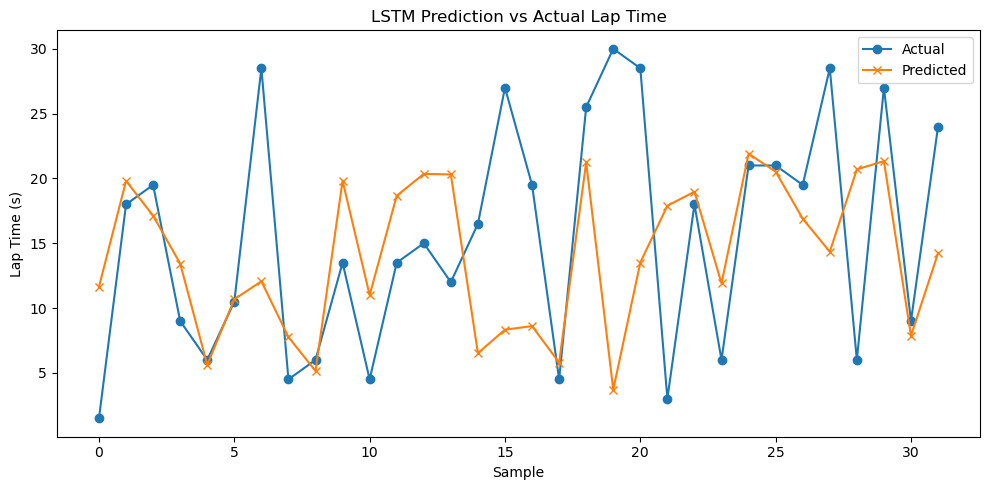


Baseline LinearReg MAE: 7.345254512699673

🏎️ Sample Predictions:
Sample 1: Actual 1.50s | LSTM 11.64s | Baseline 9.74s
Sample 2: Actual 18.00s | LSTM 19.81s | Baseline 20.57s
Sample 3: Actual 19.50s | LSTM 17.12s | Baseline 19.46s
Sample 4: Actual 9.00s | LSTM 13.43s | Baseline 15.83s
Sample 5: Actual 6.00s | LSTM 5.62s | Baseline 5.71s

✅ Training complete!
Artifacts saved:
 - Model: ../ml_models/lstm_lap_time_model.h5
 - Scalers: ../ml_models/lstm_X_scaler.pkl, lstm_y_scaler.pkl
 - Plot: ../ml_models/lstm_vs_actual.png

📊 Performance Summary:
   LSTM MAE: 7.158s
   Baseline MAE: 7.345s
   LSTM R²: -0.181
   LSTM vs Baseline: Better by 0.187s

⚠️  R² is negative - model performs worse than predicting mean
   Consider: more data, different features, or simpler baseline models


In [5]:
# Metrics (FIXED)
y_pred = model.predict(X_test_lstm).flatten()
y_pred_orig = scaler_y.inverse_transform(y_pred.reshape(-1, 1)).flatten()  # ← Fix: reshape before inverse_transform
y_test_orig = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()  # ← Fix: reshape before inverse_transform

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
print("\nTest MAE:", mean_absolute_error(y_test_orig, y_pred_orig))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test_orig, y_pred_orig)))
print("R² Score:", r2_score(y_test_orig, y_pred_orig))

# Plot predictions
plt.figure(figsize=(10,5))
plt.plot(y_test_orig, label='Actual', marker='o')
plt.plot(y_pred_orig, label='Predicted', marker='x')
plt.legend()
plt.title('LSTM Prediction vs Actual Lap Time')
plt.xlabel('Sample')
plt.ylabel('Lap Time (s)')
plt.tight_layout()
plt.savefig('../ml_models/lstm_vs_actual.png', dpi=150)
plt.show()

# Save model
model.save('../ml_models/lstm_lap_time_model.h5')

# Baseline: Simple Linear Regression
from sklearn.linear_model import LinearRegression
linreg = LinearRegression().fit(X_train, y_train)
y_pred_lin = linreg.predict(X_test)
y_pred_lin_orig = scaler_y.inverse_transform(y_pred_lin.reshape(-1, 1)).flatten()  # ← Fix: reshape
print("\nBaseline LinearReg MAE:", mean_absolute_error(y_test_orig, y_pred_lin_orig))

# Results
print("\n🏎️ Sample Predictions:")
for i in range(min(5, len(y_test_orig))):
    print(f"Sample {i+1}: Actual {y_test_orig[i]:.2f}s | LSTM {y_pred_orig[i]:.2f}s | Baseline {y_pred_lin_orig[i]:.2f}s")

print("\n✅ Training complete!")
print("Artifacts saved:")
print(" - Model: ../ml_models/lstm_lap_time_model.h5")
print(" - Scalers: ../ml_models/lstm_X_scaler.pkl, lstm_y_scaler.pkl")
print(" - Plot: ../ml_models/lstm_vs_actual.png")

# Performance summary
mae_lstm = mean_absolute_error(y_test_orig, y_pred_orig)
mae_baseline = mean_absolute_error(y_test_orig, y_pred_lin_orig)
r2_lstm = r2_score(y_test_orig, y_pred_orig)

print(f"\n📊 Performance Summary:")
print(f"   LSTM MAE: {mae_lstm:.3f}s")
print(f"   Baseline MAE: {mae_baseline:.3f}s") 
print(f"   LSTM R²: {r2_lstm:.3f}")
print(f"   LSTM vs Baseline: {'Better' if mae_lstm < mae_baseline else 'Worse'} by {abs(mae_lstm - mae_baseline):.3f}s")

if r2_lstm < 0:
    print("\n⚠️  R² is negative - model performs worse than predicting mean")
    print("   Consider: more data, different features, or simpler baseline models")